In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
# Load the v1 dataset
basedir = Path("../../")
dataset = basedir / "./data/data_v1.npz"

with np.load(dataset) as data:
    print("Available variables:", data.files)
    noisy = data["img"]
    noiseless = data["img_nonoise"]
    label = data["label"]
    psf_r = data["psf_r"]
    snr = data['snr']
    sigma = data["sigma"]

X = noisy[..., np.newaxis]
# Y = np.log(noiseless[..., np.newaxis] + 1)
Y = noiseless[..., np.newaxis]

Available variables: ['img', 'img_nonoise', 'label', 'psf_r', 'snr', 'sigma']


In [4]:
# Winner so far:
# model = tf.keras.models.load_model("./models/edsr.tf")

model = tf.keras.models.load_model("./models/rdn.tf")
# model = tf.keras.models.load_model("./models/edsr_log2.tf")
# model = tf.keras.models.load_model("rdn_log2.tf")

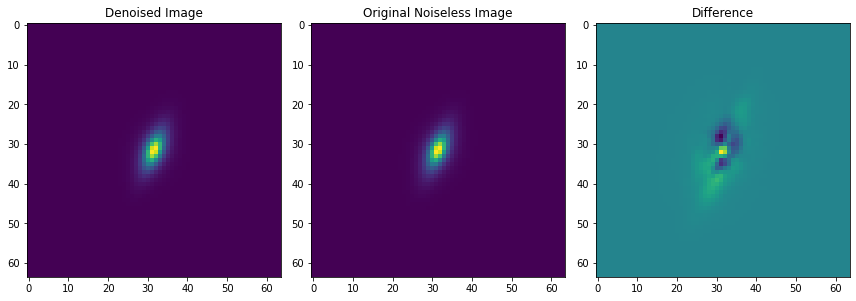

In [5]:
# Plot the results
image_idx = 3
pred = model.predict(X[np.newaxis, image_idx])[0]

fig, ax = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
# ax[0].imshow(X[image_idx].reshape(64, 64))
# ax[0].set_title("Original Noisy Image")
ax[0].imshow(pred.reshape(64, 64))
ax[0].set_title("Denoised Image")
ax[1].imshow(Y[image_idx].reshape(64, 64))
ax[1].set_title("Original Noiseless Image");
ax[2].imshow((Y[image_idx] - pred).reshape(64, 64))
ax[2].set_title("Difference");

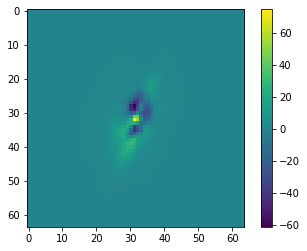

In [6]:
plt.imshow((Y[image_idx] - pred).reshape(64, 64))
plt.colorbar();

In [7]:
# Denoise the v1 dataset
pred = model.predict(X, batch_size=128, verbose=1)

200000/200000 [==============================] - 736s 4ms/sample


In [8]:
# Save the results
np.savez(
    basedir / "./data/data_v1d.npz",
    img_denoised=pred.reshape(-1, 64, 64),
    label=label,
    psf_r=psf_r,
    snr=snr,
    sigma=sigma,
)